## Hausarbeit 5.1
Experimentieren Sie mit der Anzahl der versteckten Neuronen und der 
Lernrate. Welche Änderungen erzeugen ein lineares Ausgangsverhalten
und welche Änderungen führen zu starkem “Overfitting”?


<span style="color:red">**Anmerkung: Die Beantwortung der Fragen finden Sie am Ende dieses Notebooks**</span>

In [206]:
import numpy as np
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import os
import torch.nn as nn
from collections import OrderedDict
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [207]:
# Definition des Datensatzes
torch.set_printoptions(edgeitems=2, linewidth=75)
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) 
t_u = torch.tensor(t_u).unsqueeze(1) 

In [208]:
# Bildung der zufälligen Indizes
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

In [209]:
# Aufteilen der Daten in zufällige Validierungs- und Trainingsdatensätze
# Trainingsdatensatz
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

# Validierungsdatensatz
t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

# Normieren der Daten
t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [210]:
# Definition des Trainingloops
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train) # <1>
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val) # <1>
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward() # <2>
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")

In [211]:
## Experimentieren mit der Anzahl der versteckten Neuronen Neuronen: 

########## Neuronen = 1 ############
# Definition des KNN-Modells
hidden_layers = 1
seq_model1 = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, hidden_layers)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(hidden_layers, 1))
]))

# Definition des Optimizers
optimizer = optim.SGD(seq_model1.parameters(), lr=1e-3) 

# Trainieren des Modells
training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model1,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

########## Neuronen = 13 ############
hidden_layers = 13
seq_model13 = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, hidden_layers)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(hidden_layers, 1))
]))

# Definition des Optimizers
optimizer = optim.SGD(seq_model13.parameters(), lr=1e-3) 

# Trainieren des Modells
training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model13,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

########## Neuronen = 2000 ############
hidden_layers = 1500
seq_model1500 = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, hidden_layers)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(hidden_layers, 1))
]))

# Definition des Optimizers
optimizer = optim.SGD(seq_model1500.parameters(), lr=1e-3) 

# Trainieren des Modells
training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model1500,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)


Epoch 1, Training loss 209.9613, Validation loss 284.1287
Epoch 1000, Training loss 25.1299, Validation loss 32.3844
Epoch 2000, Training loss 14.4882, Validation loss 10.0784
Epoch 3000, Training loss 15.4513, Validation loss 11.0314
Epoch 4000, Training loss 14.3742, Validation loss 7.9743
Epoch 5000, Training loss 13.9125, Validation loss 7.1509
Epoch 1, Training loss 171.1037, Validation loss 231.8091
Epoch 1000, Training loss 4.7642, Validation loss 5.7962
Epoch 2000, Training loss 4.7793, Validation loss 5.8570
Epoch 3000, Training loss 2.8154, Validation loss 3.3191
Epoch 4000, Training loss 2.2975, Validation loss 2.6569
Epoch 5000, Training loss 1.9572, Validation loss 2.2640
Epoch 1, Training loss 190.2498, Validation loss 257.8707
Epoch 1000, Training loss 2.0855, Validation loss 3.8037
Epoch 2000, Training loss 1.9146, Validation loss 3.1790
Epoch 3000, Training loss 1.8682, Validation loss 3.1055
Epoch 4000, Training loss 2.6553, Validation loss 3.4420
Epoch 5000, Training

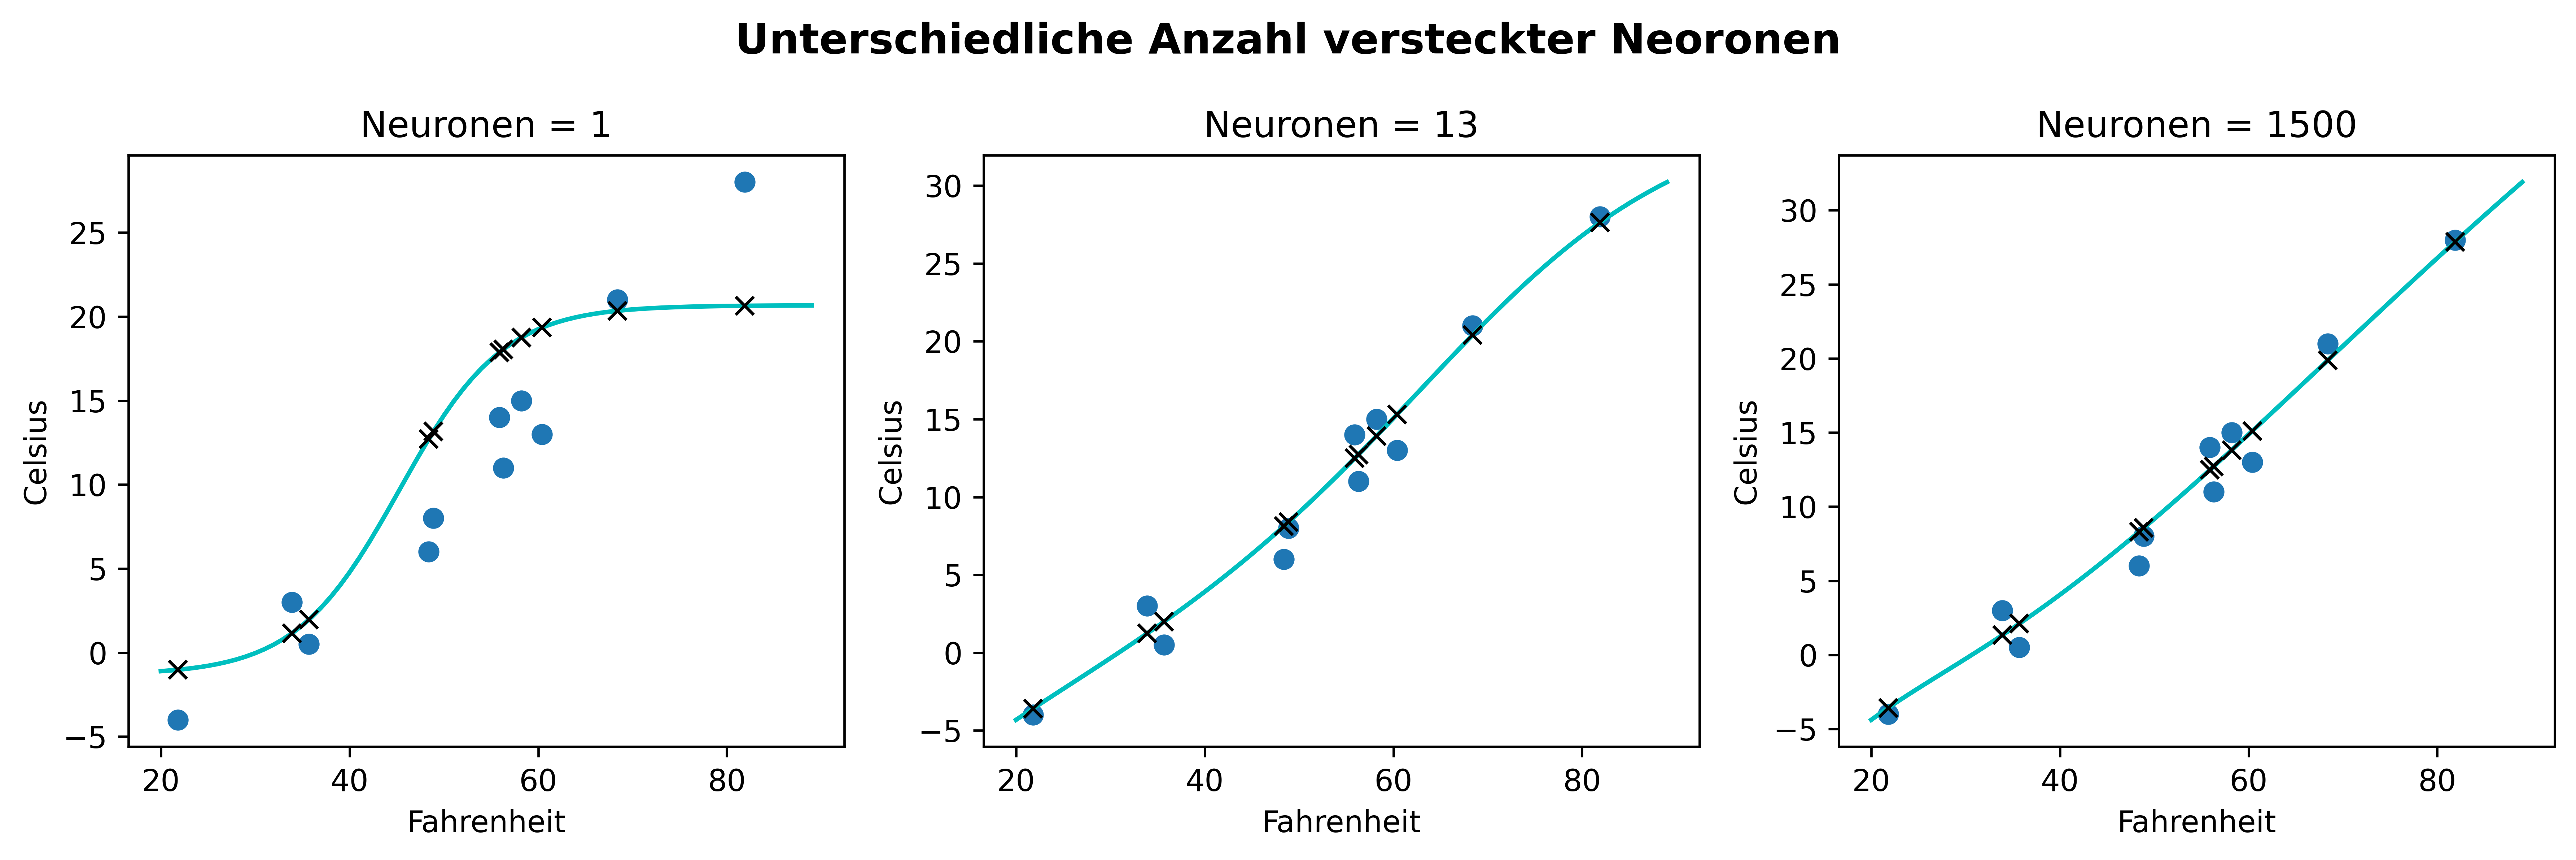

In [212]:
############ Darstellung Experiment Anzahl versteckter Neuronen ###############
t_range = torch.arange(20., 90.).unsqueeze(1)

fig, axes = plt.subplots(1, 3, figsize=(12, 4), dpi=600)
seq_models = {1: seq_model1, 13: seq_model13, 1500: seq_model1500}

hidden_layers = [1, 13, 1500]

for i, hidden_layer in enumerate(hidden_layers):
    ax = axes[i]
    ax.set_xlabel("Fahrenheit")
    ax.set_ylabel("Celsius")
    ax.plot(t_u.numpy(), t_c.numpy(), 'o')
    ax.plot(t_range.numpy(), seq_models[hidden_layer](0.1 * t_range).detach().numpy(), 'c-')
    ax.plot(t_u.numpy(), seq_models[hidden_layer](0.1 * t_u).detach().numpy(), 'kx')
    ax.set_title(f"Neuronen = {hidden_layer}")

fig.suptitle("Unterschiedliche Anzahl versteckter Neuronen", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [213]:
## Experimentieren mit der Lernrate:

########## Lernrate = 1e-3 ############
# Definition des KNN-Modells
hidden_layers = 13
seq_model1 = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, hidden_layers)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(hidden_layers, 1))
]))

# Definition des Optimizers
optimizer1 = optim.SGD(seq_model1.parameters(), lr=1e-3) 

# Trainieren des Modells
training_loop(
    n_epochs = 5000, 
    optimizer = optimizer1,
    model = seq_model1,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

########## Lernrate = 1e-5 ############
# Definition des KNN-Modells
hidden_layers = 13
seq_model2 = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, hidden_layers)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(hidden_layers, 1))
]))

# Definition des Optimizers
optimizer2 = optim.SGD(seq_model2.parameters(), lr=1e-5) 

# Trainieren des Modells
training_loop(
    n_epochs = 5000, 
    optimizer = optimizer2,
    model = seq_model2,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

########## Lernrate = 1e-1 ############
# Definition des KNN-Modells
hidden_layers = 13
seq_model3 = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, hidden_layers)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(hidden_layers, 1))
]))
# Definition des Optimizers
optimizer3 = optim.SGD(seq_model3.parameters(), lr=1e-2) 

# Trainieren des Modells
training_loop(
    n_epochs = 5000, 
    optimizer = optimizer3,
    model = seq_model3,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

Epoch 1, Training loss 162.4719, Validation loss 219.7673
Epoch 1000, Training loss 4.0963, Validation loss 4.4640
Epoch 2000, Training loss 2.3043, Validation loss 2.3161
Epoch 3000, Training loss 2.0947, Validation loss 2.0657
Epoch 4000, Training loss 1.9050, Validation loss 2.0261
Epoch 5000, Training loss 1.8710, Validation loss 2.1074
Epoch 1, Training loss 187.9731, Validation loss 254.7688
Epoch 1000, Training loss 142.5227, Validation loss 191.8208
Epoch 2000, Training loss 114.3054, Validation loss 150.4196
Epoch 3000, Training loss 96.7304, Validation loss 122.8219
Epoch 4000, Training loss 85.7125, Validation loss 104.3121
Epoch 5000, Training loss 78.5696, Validation loss 91.7542
Epoch 1, Training loss 176.2189, Validation loss 238.7820
Epoch 1000, Training loss 16.5365, Validation loss 12.7060
Epoch 2000, Training loss 3.5328, Validation loss 13.1948
Epoch 3000, Training loss 1.5669, Validation loss 8.9700
Epoch 4000, Training loss 1.5040, Validation loss 8.8989
Epoch 500

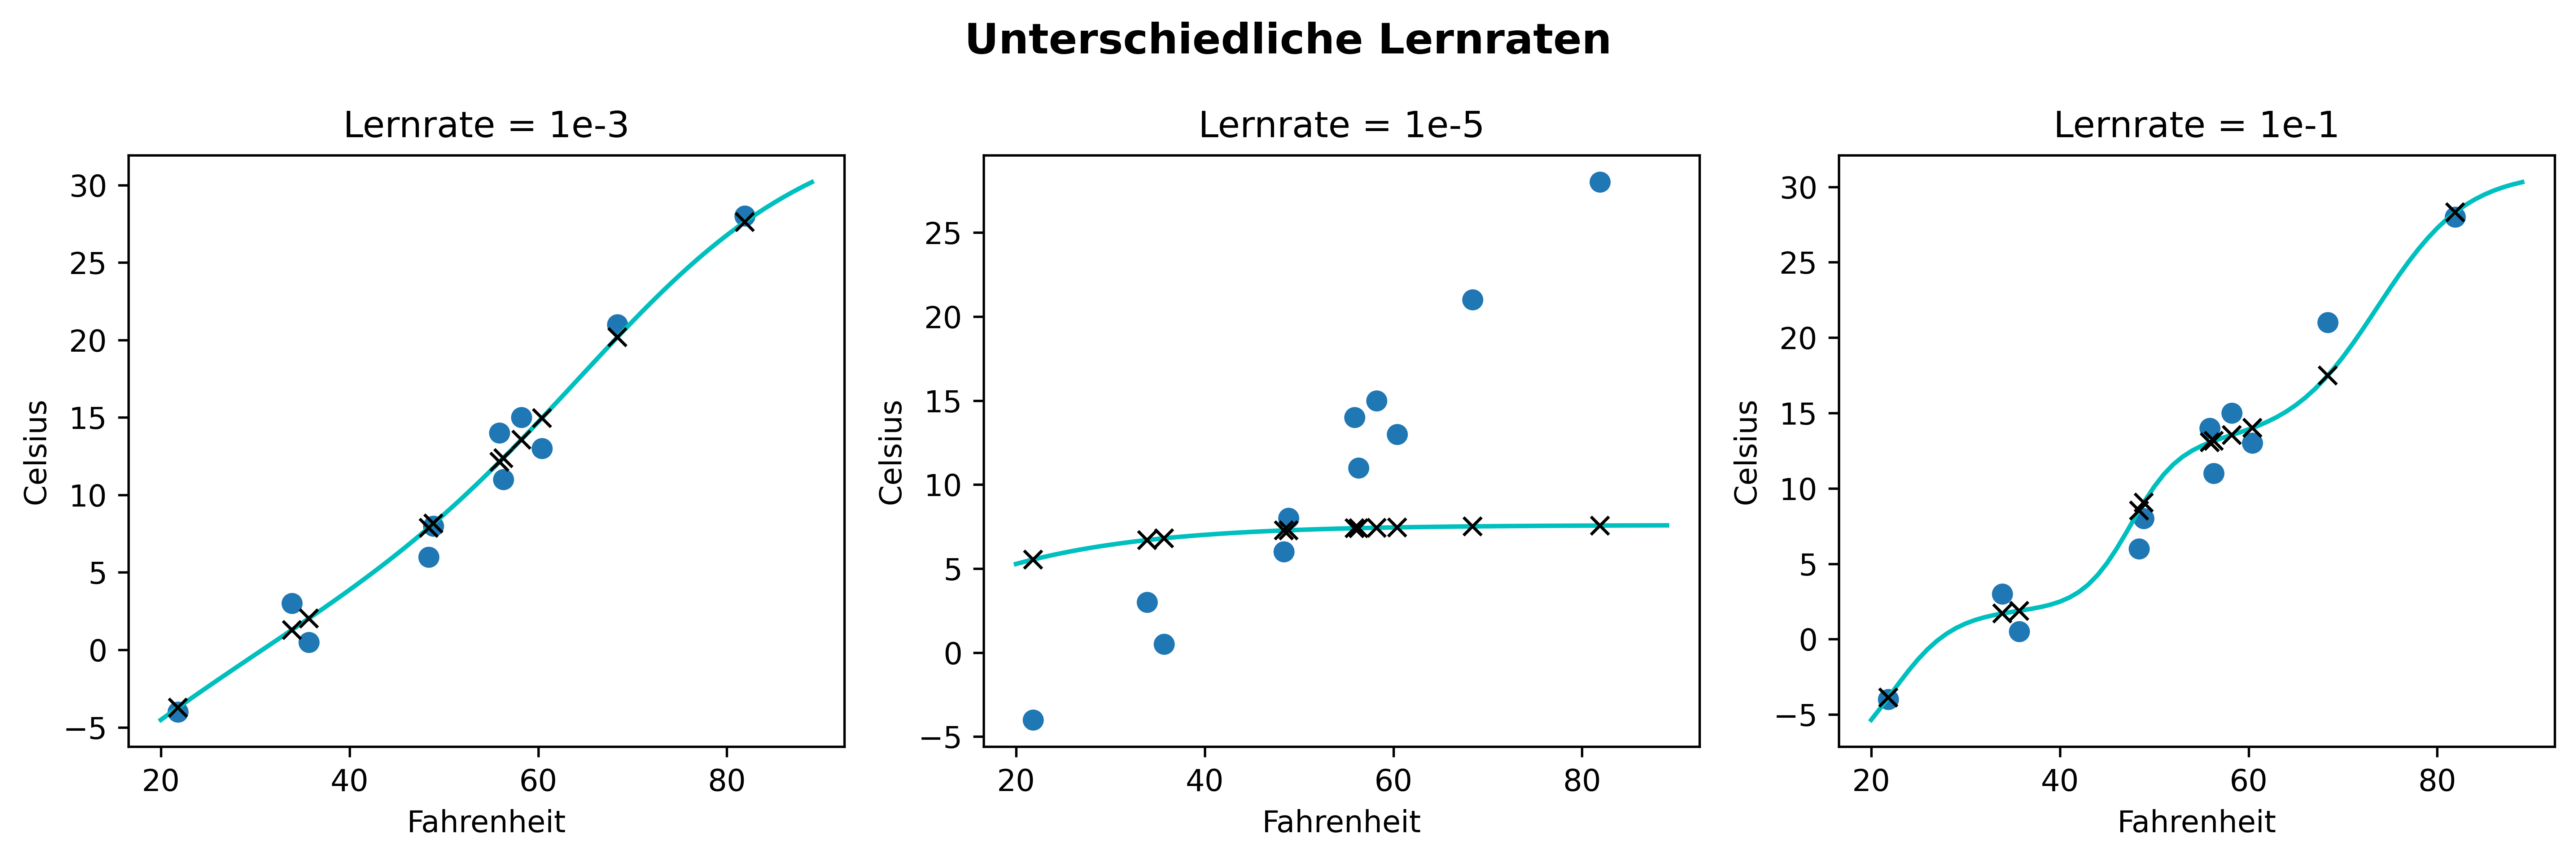

In [214]:
############### Darstellung Experiment unterschiedliche Learning-Rates ###########
t_range = torch.arange(20., 90.).unsqueeze(1)

fig, axes = plt.subplots(1, 3, figsize=(12, 4), dpi=600)

learning_rate = [1e-3, 1e-5, 1e-1]
titels = [1e-3, 1e-5, 1e-1]
seq_models = [seq_model1, seq_model2, seq_model3]

for i, lr in enumerate(learning_rate):
    ax = axes[i]
    ax.set_xlabel("Fahrenheit")
    ax.set_ylabel("Celsius")
    ax.plot(t_u.numpy(), t_c.numpy(), 'o')
    ax.plot(t_range.numpy(), seq_models[i](0.1 * t_range).detach().numpy(), 'c-')
    ax.plot(t_u.numpy(), seq_models[i](0.1 * t_u).detach().numpy(), 'kx')
    ax.set_title("{}".format(titles[i]))

fig.suptitle("Unterschiedliche Lernraten", fontsize=14, fontweight = 'bold')
plt.tight_layout()
plt.show()

#### **Frage: Welche Änderungen erzeugen ein lineares Ausgangsverhalten und welche Änderungen führen zu starkem “Overfitting”?**
Antwort:  